<a href="https://colab.research.google.com/github/mg-04/ODE/blob/main/Ming's_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Author: Anthony Chang
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from google.colab import files

In [3]:
def load_constants():
  m = 0.05
  g = 9.8
  c = 0.0
  T_c = 0.45
  l_mouth = 0.065

In [4]:
def velotaker(xprime=2, yprime=2, y=1.2, cin=0, dif_ax=0.25):
  m = 0.05
  g = 9.8
  c = cin
  T_c = 0.45
  l_mouth = 0.065

  def model(y, t):
    y1, y2 = y
    dy1dt = y2
    dy2dt = -g - (c * np.abs(y2) * y2) / m
    return [dy1dt, dy2dt]

  y0 = [y, yprime]

  t = np.linspace(0, 2, 2001)

  solve = odeint(model, y0, t)
  y, y_prime = solve[:, 0], solve[:, 1]
  def model(x, t):
    x1, x2 = x
    dx1dt = x2
    dx2dt = -(c / m) * x2**2
    return [dx1dt, dx2dt]

  x0 = [0, xprime]
  t = np.linspace(0, 2, 2001)
  solution = odeint(model, x0, t)
  x, x_prime = solution[:, 0], solution[:, 1]

  T_a = next((t for t, y_val in enumerate(y) if y_val >= 0), -1)
  if T_a != -1:
    T_a = min(range(len(y)), key=lambda t: abs(y_prime[t] * T_c + y[t])) # in miliseconds
  T_a /= 1000

  T_c2 = -1 # in miliseconds
  prev_best = float('inf')

  for t, value in enumerate(y):
      if prev_best > value and value >= 0 :
          T_c2, prev_best = t, value
  T_c2 /= 1000

  xprimec1 = x_prime[int(T_a * 1000)]
  yprimec1 = y_prime[int(T_a * 1000)]
  xprimec2 = x_prime[int(T_c2 * 1000)]
  yprimec2 = y_prime[int(T_c2 * 1000)]

  phi = np.cos(np.arctan(yprimec2/xprimec2) - np.arctan(yprimec1/xprimec1)) #PHI

  T_c1 = T_a + T_c
  t = np.linspace(0, 2, 2001)
  idx_c1 = np.argmax(t >= T_c1)
  idx_c2 = np.argmax(t >= T_c2)

  #print(idx_c1)
  #print(idx_c2)
  t_values_interval = t[idx_c2:idx_c1 + 1]
  x_values_interval = x_prime[idx_c2:idx_c1 + 1]

  x_error =  np.trapz(x_values_interval, x=t_values_interval) #XERROR ARRAY
  x_airerror =  x[idx_c1]-x[idx_c2]-(T_c1-T_c2) * x_prime[idx_c1]

  T_b2 = T_c2 - (l_mouth/np.sqrt(xprimec2**2 + yprimec2**2)) #Solve for TB2
  T_open = T_b2 - T_a #TOPEN

  # Prose Constants
  F1 = 32
  F2 = -1
  k = 400
  c = 21.5
  m = 0.26
  T = 0.3
  ax = dif_ax

  s1 = (np.sqrt(c**2-(4*m*k))-c)/(2*m)
  s2 = ((-1*np.sqrt(c**2-(4*m*k)))-c)/(2*m)

  A1 = (F1 * s1 * s2) / (k * s1 * (s2 - s1)) * -1
  B1 = (F1 * s1) / (k * (s2 - s1))

  def r1(t):
    return F1 / k + A1 * np.e**(s1*t) + B1 * np.e**(s2*t)
  def r1deriv(t):
    return A1 * s1 * np.e ** (s1*t) + B1 * s2 * np.e ** (s2*t)

  B2 = (np.e**(s2*T*-1)/(s2-s1)) * (r1deriv(T) - s1 * (r1(T) - F2/k))
  A2 = np.e**(s1*T*-1) * (r1(T) - F2/k - B2 * np.e ** (s2 * T))

  def r2(t):
    return F2 / k + A2 * np.e**(s1 * t) + B2 * np.e**(s2 * t)
  def r2deriv(t):
    return A2*s1*np.e**(s1*t) + B2*s2*np.e**(s2*t)

  def R(t):
    if t <= 0:
      return 0
    if 0 < t and t < T:
      return r1(t)
    if t >= T:
      return r2(t)
  return R(T_open)*phi-ax*(x_error+x_airerror)*np.cos(np.arctan(yprimec1/xprimec1))
print(velotaker())

0.023824317239157768


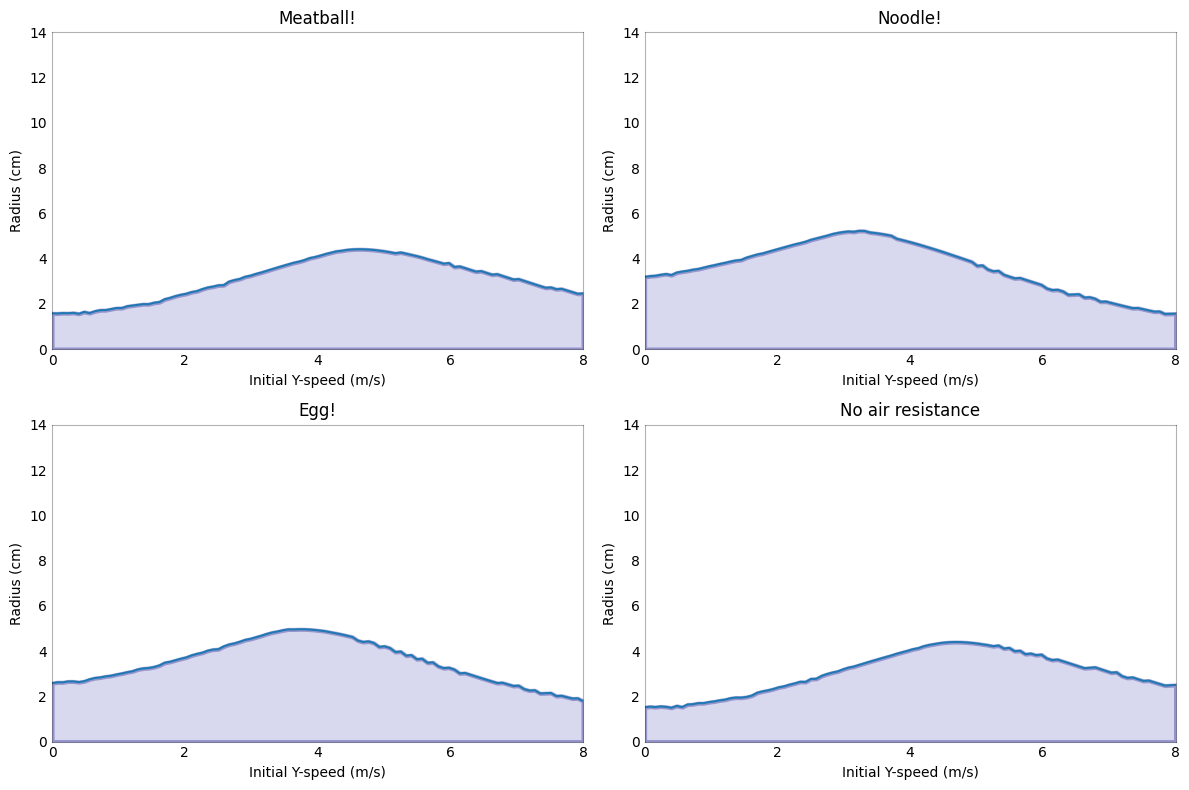

In [5]:
# Create a figure with two subplots (1 row, 2 columns)

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

they = np.linspace(0, 8, 100)
thet = [velotaker(yprime=t,cin=2.148e-4)*100 for t in they]
axs[0][0].plot(they, thet)
axs[0][0].set_xlabel('Initial Y-speed (m/s)')
axs[0][0].set_ylabel('Radius (cm)')
axs[0][0].set_xticks(np.arange(0, 9, 2))
axs[0][0].set_xlim(0, 8)
axs[0][0].set_ylim(0, 14)
axs[0][0].set_title('Meatball!')
l = axs[0][0].fill_between(they, thet)
l.set_facecolors([[.5,.5,.8,.3]])
l.set_edgecolors([[0, 0, .5, .3]])
l.set_linewidths([3])
axs[0][0].xaxis.set_tick_params(size=0)
axs[0][0].yaxis.set_tick_params(size=0)
#axs[0][0].grid(False)
for i in range(2):
  for j in range(2):
    axs[i][j].spines["top"].set_alpha(.3)
    axs[i][j].spines["bottom"].set_alpha(.3)
    axs[i][j].spines["right"].set_alpha(.3)
    axs[i][j].spines["left"].set_alpha(.3)
thet = [velotaker(yprime=t,cin=5.941e-3)*100 for t in they]
axs[1][0].plot(they, thet)
axs[1][0].set_title('Egg!')
axs[1][0].set_xlim(0, 8)
axs[1][0].set_ylim(0, 14)
axs[1][0].set_xticks(np.arange(0, 9, 2))
l = axs[1][0].fill_between(they, thet)
l.set_facecolors([[.5,.5,.8,.3]])
l.set_edgecolors([[0, 0, .5, .3]])
l.set_linewidths([3])
axs[1][0].set_xlabel('Initial Y-speed (m/s)')
axs[1][0].set_ylabel('Radius (cm)')
axs[1][0].xaxis.set_tick_params(size=0)
axs[1][0].yaxis.set_tick_params(size=0)
#axs[1][0].grid(False)
thet = [velotaker(yprime=t, cin=0.01)*100 for t in they]
axs[0][1].set_title('Noodle!')
axs[0][1].plot(they, thet)
axs[0][1].set_xlim(0, 8)
axs[0][1].set_ylim(0, 14)
axs[0][1].set_xticks(np.arange(0, 9, 2))
l = axs[0][1].fill_between(they, thet)
l.set_facecolors([[.5, .5, .8, .3]])
l.set_edgecolors([[0, 0, .5, .3]])
l.set_linewidths([3])
axs[0][1].set_xlabel('Initial Y-speed (m/s)')
axs[0][1].set_ylabel('Radius (cm)')
axs[0][1].xaxis.set_tick_params(size=0)
axs[0][1].yaxis.set_tick_params(size=0)
#axs[0][1].grid(False)
thet = [velotaker(yprime=t, cin=0)*100 for t in they]
axs[1][1].set_title('No air resistance')
axs[1][1].plot(they, thet)
axs[1][1].set_xlim(0, 8)
axs[1][1].set_ylim(0, 14)
axs[1][1].set_xticks(np.arange(0, 9, 2))
l = axs[1][1].fill_between(they, thet)
l.set_facecolors([[.5, .5, .8, .3]])
l.set_edgecolors([[0, 0, .5, .3]])
l.set_linewidths([3])
axs[1][1].set_xlabel('Initial Y-speed (m/s)')
axs[1][1].set_ylabel('Radius (cm)')
axs[1][1].xaxis.set_tick_params(size=0)
axs[1][1].yaxis.set_tick_params(size=0)

fig.tight_layout()
fig.show()

Next version of the graphs stacking version

<ipython-input-4-e2434c246e27>:49: RuntimeWarning: divide by zero encountered in double_scalars
  phi = np.cos(np.arctan(yprimec2/xprimec2) - np.arctan(yprimec1/xprimec1)) #PHI
<ipython-input-4-e2434c246e27>:102: RuntimeWarning: divide by zero encountered in double_scalars
  return R(T_open)*phi-ax*(x_error+x_airerror)*np.cos(np.arctan(yprimec1/xprimec1))


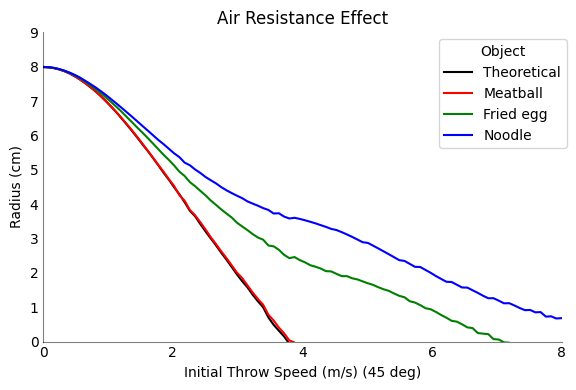

In [6]:
import seaborn as sns
fig, axs = plt.subplots(1, 1, figsize=(6, 4))

they = np.linspace(0, 8, 100)
themeatball = [velotaker(yprime=t/np.sqrt(2),xprime=t/np.sqrt(2),cin=2.148e-4) * 100 for t in they]
theegg = [velotaker(yprime=t/np.sqrt(2),xprime=t/np.sqrt(2),cin=5.941e-3) * 100 for t in they]
thenoodle = [velotaker(yprime=t/np.sqrt(2), xprime=t/np.sqrt(2),cin=0.01) * 100 for t in they]
thenoair = [velotaker(yprime=t/np.sqrt(2), xprime=t/np.sqrt(2),cin=0) * 100 for t in they]

palette = sns.color_palette("flare", 4)
axs.plot(they, thenoair, label='Theoretical', color="black")
axs.plot(they, themeatball, label='Meatball', color="red")
axs.plot(they, theegg, label='Fried egg', color="green")
axs.plot(they, thenoodle, label='Noodle', color="blue")

#Config stuff
axs.set_xlim(0, 8)

axs.spines["top"].set_alpha(0)
axs.spines["bottom"].set_alpha(.5)
axs.spines["right"].set_alpha(0)
axs.spines["left"].set_alpha(.5)
axs.xaxis.set_tick_params(size=0)
axs.yaxis.set_tick_params(size=0)
axs.grid(False)
axs.set_xticks(np.arange(0, 9, 2))
axs.legend(loc='upper left', bbox_to_anchor=(0.75,1), title="Object")
axs.set_xlabel('Initial Throw Speed (m/s) (45 deg)')
axs.set_ylabel('Radius (cm)')
axs.set_title('Air Resistance Effect')
axs.set_ylim(0, 9)

fig.tight_layout()
fig.show()

Change in ax the way that ming wanted it in the discord.

<ipython-input-4-e2434c246e27>:49: RuntimeWarning: divide by zero encountered in double_scalars
  phi = np.cos(np.arctan(yprimec2/xprimec2) - np.arctan(yprimec1/xprimec1)) #PHI
<ipython-input-4-e2434c246e27>:102: RuntimeWarning: divide by zero encountered in double_scalars
  return R(T_open)*phi-ax*(x_error+x_airerror)*np.cos(np.arctan(yprimec1/xprimec1))


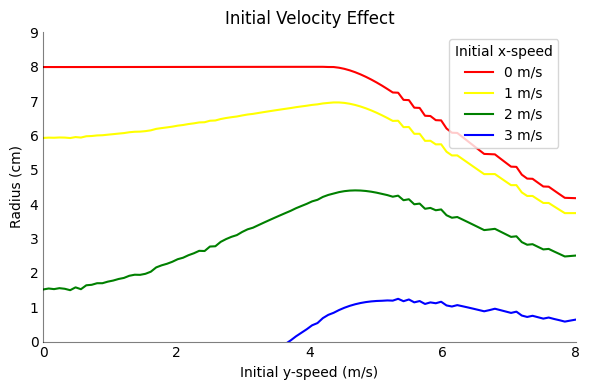

In [61]:
a_xs = {0, 0.1, 0.15, 0.2, 0.5, 1}
fig, axs = plt.subplots(1, 1, figsize=(6, 4))
they = np.linspace(0, 8, 100)
'''  themeatball = [velotaker(t,2.148e-4) * 100 for t in they]
theegg = [velotaker(t,5.941e-3) * 100 for t in they]
thenoodle = [velotaker(t, 0.01) * 100 for t in they]'''
thenoair1 = [velotaker(yprime=t, xprime=0) * 100 for t in they]
thenoair3 = [velotaker(yprime=t, xprime=1) * 100 for t in they]
thenoair5 = [velotaker(yprime=t, xprime=2) * 100 for t in they]
thenoair6 = [velotaker(yprime=t, xprime=3) * 100 for t in they]

palette = sns.color_palette("flare", 4)
'''  axs.plot(they, thenoodle, label='noodle', color="red")
axs.plot(they, theegg, label='egg', color="green")
axs.plot(they, themeatball, label='meatball', color="blue")'''
axs.plot(they, thenoair1, label='0 m/s', color="red")
#axs.plot(they, thenoair2, label='no air resistance', color="orange")
axs.plot(they, thenoair3, label='1 m/s', color="yellow")
#axs.plot(they, thenoair4, label='no air resistance', color="green")
axs.plot(they, thenoair5, label='2 m/s', color="green")
axs.plot(they, thenoair6, label='3 m/s', color="blue")
#Config stuff
axs.set_xlim(0, 8)

axs.spines["top"].set_alpha(0)
axs.spines["bottom"].set_alpha(.5)
axs.spines["right"].set_alpha(0)
axs.spines["left"].set_alpha(.5)
axs.xaxis.set_tick_params(size=0)
axs.yaxis.set_tick_params(size=0)
axs.grid(False)
axs.set_xticks(np.arange(0, 9, 2))
axs.set_ylim(0, 9)
axs.legend(loc='upper left', bbox_to_anchor=(0.75,1), title="Initial x-speed")
axs.set_xlabel('Initial y-speed (m/s)')
axs.set_ylabel('Radius (cm)')
axs.set_title('Initial Velocity Effect')
fig.tight_layout()
fig.show()

<ipython-input-4-e2434c246e27>:49: RuntimeWarning: divide by zero encountered in double_scalars
  phi = np.cos(np.arctan(yprimec2/xprimec2) - np.arctan(yprimec1/xprimec1)) #PHI
<ipython-input-4-e2434c246e27>:102: RuntimeWarning: divide by zero encountered in double_scalars
  return R(T_open)*phi-ax*(x_error+x_airerror)*np.cos(np.arctan(yprimec1/xprimec1))


-0.03309608874743608


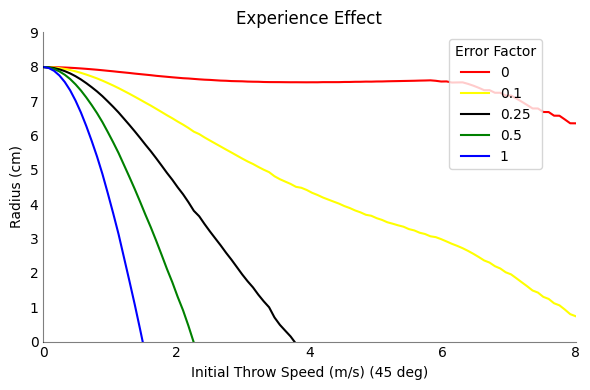

In [59]:
a_xs = {0, 0.1, 0.15, 0.2, 0.5, 1}
fig, axs = plt.subplots(1, 1, figsize=(6, 4))
they = np.linspace(0, 8, 100)
'''  themeatball = [velotaker(t,2.148e-4) * 100 for t in they]
theegg = [velotaker(t,5.941e-3) * 100 for t in they]
thenoodle = [velotaker(t, 0.01) * 100 for t in they]'''
thenoair1 = [velotaker(yprime=t/np.sqrt(2), xprime=t/np.sqrt(2), dif_ax=0) * 100 for t in they]
thenoair3 = [velotaker(yprime=t/np.sqrt(2), xprime=t/np.sqrt(2), dif_ax=0.1) * 100 for t in they]
thenoair4 = [velotaker(yprime=t/np.sqrt(2), xprime=t/np.sqrt(2), dif_ax=0.25) * 100 for t in they]

thenoair5 = [velotaker(yprime=t/np.sqrt(2), xprime=t/np.sqrt(2), dif_ax=0.5) * 100 for t in they]
thenoair6 = [velotaker(yprime=t/np.sqrt(2), xprime=t/np.sqrt(2), dif_ax=1) * 100 for t in they]
print(velotaker(yprime=1.3, xprime=1.3, dif_ax=1))

palette = sns.color_palette("flare", 4)
'''  axs.plot(they, thenoodle, label='noodle', color="red")
axs.plot(they, theegg, label='egg', color="green")
axs.plot(they, themeatball, label='meatball', color="blue")'''
axs.plot(they, thenoair1, label='0', color="red")
#axs.plot(they, thenoair2, label='no air resistance', color="orange")
axs.plot(they, thenoair3, label='0.1', color="yellow")
axs.plot(they, thenoair4, label='0.25', color="black")
axs.plot(they, thenoair5, label='0.5', color="green")
#axs.plot(they, thenoair6, label='a_x = 0.5', color="blue")
axs.plot(they, thenoair6, label='1', color="blue")


#Config stuff
axs.set_xlim(0, 8)

axs.spines["top"].set_alpha(0)
axs.spines["bottom"].set_alpha(.5)
axs.spines["right"].set_alpha(0)
axs.spines["left"].set_alpha(.5)
axs.xaxis.set_tick_params(size=0)
axs.yaxis.set_tick_params(size=0)
axs.grid(False)
axs.set_xticks(np.arange(0, 9, 2))
axs.set_ylim(0, 9)
axs.legend(loc='upper left', bbox_to_anchor=(0.75,1), title = "Error Factor")
axs.set_xlabel('Initial Throw Speed (m/s) (45 deg)')
axs.set_ylabel('Radius (cm)')
axs.set_title('Experience Effect')
fig.tight_layout()
axs.set_ylim(0, 9)

fig.show()

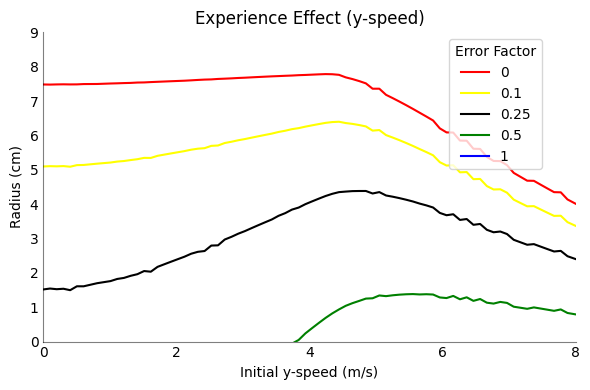

In [73]:
a_xs = {0, 0.1, 0.15, 0.2, 0.5, 1}
fig, axs = plt.subplots(1, 1, figsize=(6, 4))
they = np.linspace(0, 10, 100)
'''  themeatball = [velotaker(t,2.148e-4) * 100 for t in they]
theegg = [velotaker(t,5.941e-3) * 100 for t in they]
thenoodle = [velotaker(t, 0.01) * 100 for t in they]'''
thenoair1 = [velotaker(yprime=t, xprime=2,dif_ax=0) * 100 for t in they]
thenoair3 = [velotaker(yprime=t, xprime=2,dif_ax=0.1) * 100 for t in they]
thenoair4 = [velotaker(yprime=t, xprime=2,dif_ax=0.25) * 100 for t in they]

thenoair5 = [velotaker(yprime=t, xprime=2,dif_ax=0.5) * 100 for t in they]
thenoair6 = [velotaker(yprime=t, xprime=2,dif_ax=1) * 100 for t in they]

palette = sns.color_palette("flare", 4)
'''  axs.plot(they, thenoodle, label='noodle', color="red")
axs.plot(they, theegg, label='egg', color="green")
axs.plot(they, themeatball, label='meatball', color="blue")'''
axs.plot(they, thenoair1, label='0', color="red")
#axs.plot(they, thenoair2, label='no air resistance', color="orange")
axs.plot(they, thenoair3, label='0.1', color="yellow")
axs.plot(they, thenoair4, label='0.25', color="black")
axs.plot(they, thenoair5, label='0.5', color="green")
#axs.plot(they, thenoair6, label='a_x = 0.5', color="blue")
axs.plot(they, thenoair6, label='1', color="blue")


#Config stuff
axs.set_xlim(0, 8)

axs.spines["top"].set_alpha(0)
axs.spines["bottom"].set_alpha(.5)
axs.spines["right"].set_alpha(0)
axs.spines["left"].set_alpha(.5)
axs.xaxis.set_tick_params(size=0)
axs.yaxis.set_tick_params(size=0)
axs.grid(False)
axs.set_xticks(np.arange(0, 9, 2))
axs.set_ylim(0, 9)
axs.legend(loc='upper left', bbox_to_anchor=(0.75,1), title = "Error Factor")
axs.set_xlabel('Initial y-speed (m/s)')
axs.set_ylabel('Radius (cm)')
axs.set_title('Experience Effect (y-speed)')
fig.tight_layout()
axs.set_ylim(0, 9)

fig.show()

<ipython-input-4-e2434c246e27>:49: RuntimeWarning: divide by zero encountered in double_scalars
  phi = np.cos(np.arctan(yprimec2/xprimec2) - np.arctan(yprimec1/xprimec1)) #PHI
<ipython-input-4-e2434c246e27>:102: RuntimeWarning: divide by zero encountered in double_scalars
  return R(T_open)*phi-ax*(x_error+x_airerror)*np.cos(np.arctan(yprimec1/xprimec1))


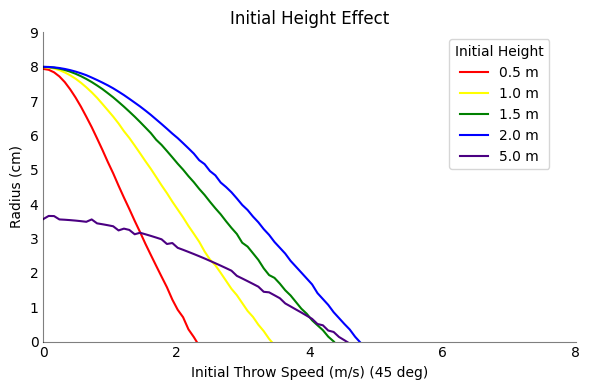

In [17]:
a_xs = {0, 0.1, 0.15, 0.2, 0.5, 1}
fig, axs = plt.subplots(1, 1, figsize=(6, 4))
they = np.linspace(0, 8, 100)
'''  themeatball = [velotaker(t,2.148e-4) * 100 for t in they]
theegg = [velotaker(t,5.941e-3) * 100 for t in they]
thenoodle = [velotaker(t, 0.01) * 100 for t in they]'''
thenoair1 = [velotaker(yprime=t/np.sqrt(2), xprime=t/np.sqrt(2), y=0.5) * 100 for t in they]
thenoair3 = [velotaker(yprime=t/np.sqrt(2), xprime=t/np.sqrt(2), y=1) * 100 for t in they]
thenoair5 = [velotaker(yprime=t/np.sqrt(2), xprime=t/np.sqrt(2), y=1.5) * 100 for t in they]
thenoair6 = [velotaker(yprime=t/np.sqrt(2), xprime=t/np.sqrt(2), y=2) * 100 for t in they]
thenoair7 = [velotaker(yprime=t/np.sqrt(2), xprime=t/np.sqrt(2), y=5) * 100 for t in they]


palette = sns.color_palette("flare", 4)
'''  axs.plot(they, thenoodle, label='noodle', color="red")
axs.plot(they, theegg, label='egg', color="green")
axs.plot(they, themeatball, label='meatball', color="blue")'''
axs.plot(they, thenoair1, label='0.5 m', color="red")
#axs.plot(they, thenoair2, label='no air resistance', color="orange")
axs.plot(they, thenoair3, label='1.0 m', color="yellow")
#axs.plot(they, thenoair4, label='1.2 m', color="black")
axs.plot(they, thenoair5, label='1.5 m', color="green")
axs.plot(they, thenoair6, label='2.0 m', color="blue")
axs.plot(they, thenoair7, label='5.0 m', color="indigo")


#Config stuff
axs.set_xlim(0, 8)

axs.spines["top"].set_alpha(0)
axs.spines["bottom"].set_alpha(.5)
axs.spines["right"].set_alpha(0)
axs.spines["left"].set_alpha(.5)
axs.xaxis.set_tick_params(size=0)
axs.yaxis.set_tick_params(size=0)
axs.grid(False)
axs.set_xticks(np.arange(0, 9, 2))
axs.set_ylim(0, 9)
axs.legend(loc='upper left', bbox_to_anchor=(0.75,1), title="Initial Height")
axs.set_xlabel('Initial Throw Speed (m/s) (45 deg)')
axs.set_ylabel('Radius (cm)')
axs.set_title('Initial Height Effect')
fig.tight_layout()
fig.show()

Paul Roses model underneath here

In [ ]:
m = 0.05
g = 9.8
c = 0.001
T_c = 0.45
l_mouth = 0.065
yprime = 2
def model(y, t):
  y1, y2 = y
  dy1dt = y2
  dy2dt = -g - (c * np.abs(y2) * y2) / m
  return [dy1dt, dy2dt]

y0 = [1.2, yprime]

t = np.linspace(0, 2, 2001)

solve = odeint(model, y0, t)
y, y_prime = solve[:, 0], solve[:, 1]
def model(x, t):
  x1, x2 = x
  dx1dt = x2
  dx2dt = -(c / m) * x2**2
  return [dx1dt, dx2dt]

x0 = [0, 2]
t = np.linspace(0, 2, 2001)
solution = odeint(model, x0, t)
x, x_prime = solution[:, 0], solution[:, 1]

T_a = next((t for t, y_val in enumerate(y) if y_val >= 0), -1)
if T_a != -1:
  T_a = min(range(len(y)), key=lambda t: abs(y_prime[t] * T_c + y[t])) # in miliseconds
T_a /= 1000

T_c2 = -1 # in miliseconds
prev_best = float('inf')

for t, value in enumerate(y):
    if prev_best > value and value >= 0 :
        T_c2, prev_best = t, value
T_c2 /= 1000

xprimec1 = x_prime[int(T_a * 1000)]
yprimec1 = y_prime[int(T_a * 1000)]
xprimec2 = x_prime[int(T_c2 * 1000)]
yprimec2 = y_prime[int(T_c2 * 1000)]

phi = np.cos(np.arctan(yprimec2/xprimec2) - np.arctan(yprimec1/xprimec1)) #PHI

T_c1 = T_a + T_c
t = np.linspace(0, 2, 2001)
idx_c1 = np.argmax(t >= T_c1)
idx_c2 = np.argmax(t >= T_c2)

#print(idx_c1)
#print(idx_c2)
t_values_interval = t[idx_c2:idx_c1 + 1]
x_values_interval = x_prime[idx_c2:idx_c1 + 1]

x_error =  np.trapz(x_values_interval, x=t_values_interval) #XERROR ARRAY
x_airerror =  x[idx_c1]-x[idx_c2]-(T_c1-T_c2) * x_prime[idx_c1]

T_b2 = T_c2 - (l_mouth/np.sqrt(xprimec2**2 + yprimec2**2)) #Solve for TB2
T_open = T_b2 - T_a #TOPEN

# Prose Constants
F1 = 32
F2 = 0
k = 400
c = 21.5
m = 0.26
T = 0.3
ax = 0.15

s1 = (np.sqrt(c**2-(4*m*k))-c)/(2*m)
s2 = ((-1*np.sqrt(c**2-(4*m*k)))-c)/(2*m)

A1 = (F1 * s1 * s2) / (k * s1 * (s2 - s1)) * -1
B1 = (F1 * s1) / (k * (s2 - s1))

def r1(t):
  return F1 / k + A1 * np.e**(s1*t) + B1 * np.e**(s2*t)
def r1deriv(t):
  return A1 * s1 * np.e ** (s1*t) + B1 * s2 * np.e ** (s2*t)

B2 = (np.e**(s2*T*-1)/(s2-s1)) * (r1deriv(T) - s1 * (r1(T) - F2/k))
A2 = np.e**(s1*T*-1) * (r1(T) - F2/k - B2 * np.e ** (s2 * T))

def r2(t):
  return F2 / k + A2 * np.e**(s1 * t) + B2 * np.e**(s2 * t)
def r2deriv(t):
  return A2*s1*np.e**(s1*t) + B2*s2*np.e**(s2*t)

def R(t):
  if t <= 0:
    return 0
  if 0 < t and t < T:
    return r1(t)
  if t >= T:
    return r2(t)

In [ ]:
def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

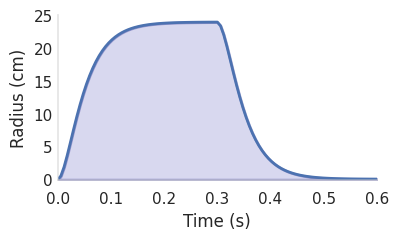

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
they = np.linspace(0, 0.6, 101)
thet = [R(t) * 100 for t in they]
thet = np.array(thet)

width = 600
fig, ax = plt.subplots(1, 1, figsize=set_size(width, fraction=0.5))

ax.set_xlabel('Time (s)')
ax.set_ylabel('Radius (cm)')
ax.set_xlim(0, 0.6)
ax.set_ylim(0, 25)
ax.spines["left"].set_alpha(.5)
ax.spines["right"].set_alpha(0)
ax.spines["bottom"].set_alpha(.5)
ax.spines["top"].set_alpha(0)
ax.grid(False)

# Use fill_between to create the filled area
l = ax.fill_between(they, thet, color=[.5, .5, .8, .3], edgecolor=[0, 0, .5, .3], linewidth=2)

# Plot the line on top of the filled area
ax.plot(they, thet, linewidth=2)

# Remove ticks from both axes
ax.xaxis.set_tick_params(size=5)
ax.yaxis.set_tick_params(size=0)

# Set ticks for the y-axis only
ax.yaxis.set_ticks([0, 5, 10, 15, 20, 25])

fig.tight_layout()
plt.show()
plt.savefig('radius.pgf')
files.download('radius.pgf')